In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/births.csv")

In [3]:
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [5]:
df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [6]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [7]:
df["year"].min()

1969

In [8]:
df["year"].max()

2008

In [9]:
df["day"] = df["day"].fillna(df["day"].mean())

In [10]:
df["gender"] = df["gender"].replace({"M" : 1, "F" : 2})

In [15]:
l = df["year"].unique()
l

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008], dtype=int64)

In [17]:
len(l)

40

In [23]:
temp = df.groupby("year")["births"].sum()
temp

year
1969    3600206
1970    3737800
1971    3563548
1972    3266235
1973    3146125
1974    3170631
1975    3153556
1976    3176476
1977    3332159
1978    3338300
1979    3499795
1980    3617981
1981    3635515
1982    3685457
1983    3642821
1984    3673568
1985    3765064
1986    3760695
1987    3813216
1988    3913793
1989    4045693
1990    4162917
1991    4115342
1992    4069428
1993    4004523
1994    3956925
1995    3903012
1996    3894874
1997    3884329
1998    3945192
1999    3963465
2000    4063823
2001    4031531
2002    4027376
2003    4096092
2004    4118907
2005    4145619
2006    4273225
2007    4324008
2008    4255156
Name: births, dtype: int64

In [25]:
type(temp)

pandas.core.series.Series

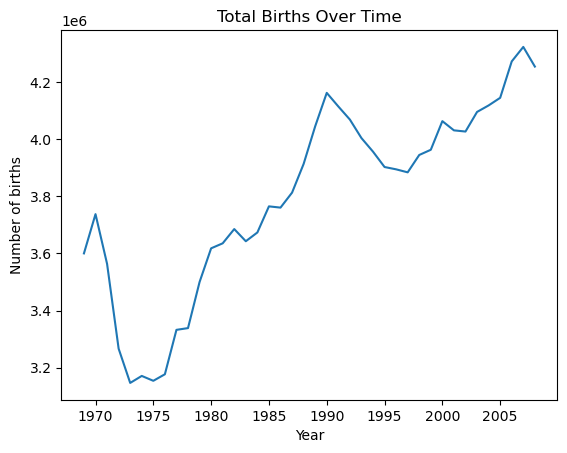

In [30]:
plt.title("Total Births Over Time")
plt.ylabel("Number of births")
plt.xlabel("Year")
plt.plot(temp)

In [32]:
#Births by gender over time
temp2 = df.groupby(["year", "gender"])["births"].sum()
temp2

year  gender
1969  1         1846572
      2         1753634
1970  1         1918636
      2         1819164
1971  1         1826774
                 ...   
2006  2         2084957
2007  1         2212118
      2         2111890
2008  1         2177227
      2         2077929
Name: births, Length: 80, dtype: int64

In [34]:
df.groupby(["year", "gender"])["births"].sum().unstack()

gender,1,2
year,,
1969,1846572,1753634
1970,1918636,1819164
1971,1826774,1736774
1972,1673888,1592347
1973,1613023,1533102
1974,1627626,1543005
1975,1618010,1535546
1976,1628863,1547613
1977,1708796,1623363


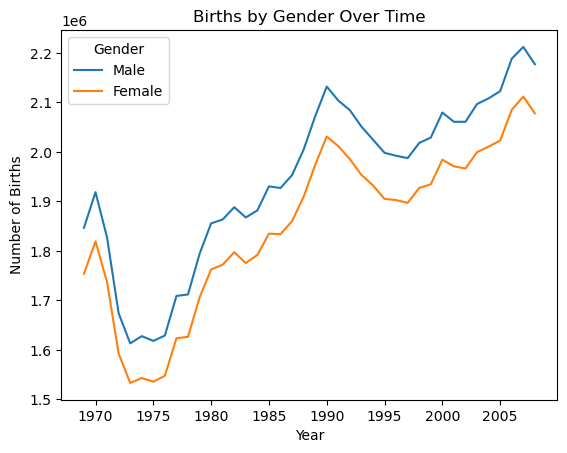

In [57]:
import matplotlib.pyplot as plt

# Group by year and gender, then sum the births
temp2 = df.groupby(["year", "gender"])["births"].sum().unstack()

# Plot the data with separate lines for each gender
ax = temp2.plot(title = "Births by Gender Over Time")  # Add title directly in plot method

# Add labels
plt.ylabel("Number of Births")
plt.xlabel("Year")

# Show the plot with the legend automatically
plt.legend(title = "Gender", labels = ["Male", "Female"])

# Show the plot
plt.show()